In [6]:
import numpy as np
from matplotlib import pyplot as plt

import sys
from pathlib import Path
current_path = Path.cwd()
target_path = current_path.parents[0] 
sys.path.insert(0, str(target_path))

print(target_path)
from plot_parameters import *

from core_equations import calculate_responsivity

c:\Users\nicol\Documents\00Research\PythonCode\ReadoutDesigner


In [12]:
# constants
V_bias = 1

# initialize arrays to store data
loop_gains = np.linspace(1, 12, 20)
S_Is = np.zeros(len(loop_gains))
S_Is_slow = np.zeros(len(loop_gains))

tau = None
omega = None

# What if detectors are slow?
tau_0 = 30e-3 # s
omega = 8 * 2 * np.pi # Hz


for l, lg in enumerate(loop_gains):
    # calculate tau
    tau = tau_0 / (lg+1)
    # calculate responsitivy for fast detector
    S_Is[l] = calculate_responsivity(V_bias, lg, tau=None, omega=None)
    # calculate responsitivy for slow detector
    S_Is_slow[l] = calculate_responsivity(V_bias, lg, tau, omega)
    


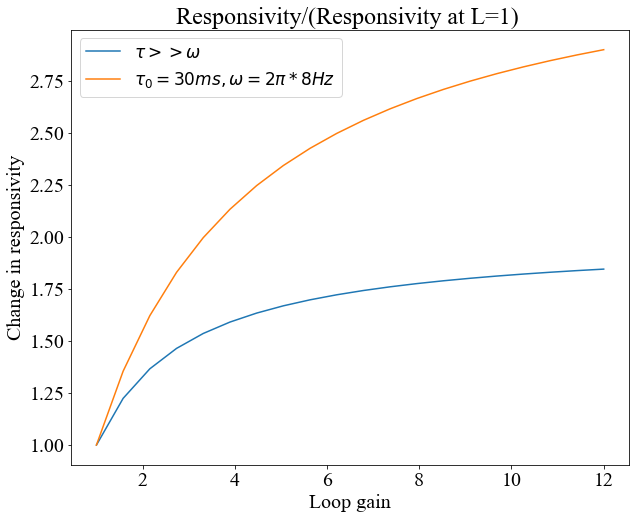

In [13]:
plt.figure(1, figsize=FIG_SIZE)
plt.plot(loop_gains, S_Is/S_Is[0], label = '$\\tau >> \\omega $')
plt.plot(loop_gains, S_Is_slow/S_Is_slow[0], label='$\\tau_0 = {:.0f} ms, \\omega = 2 \\pi * {:.0f} Hz $'.format(tau_0*1000, omega/(2*np.pi)))
plt.xlabel("Loop gain")
plt.ylabel("Change in responsivity")
plt.title("Responsivity/(Responsivity at L=1) ")
plt.legend()